## Tutorial Sheet Music Advanced Part 2: Motif Search in a String Quartet by Beethoven

(version 2022_01_03)

This tutorial explains how to refine the motif search to search not only for sequences of notes, but for sequences of notes with a specific rhythm.

The tutorial follows on from the "Tutorial Notes Advanced Part 1: Motif search at Josquin". The first steps are therefore identical. However, we have chosen another music example: a composition by a composer in whom the use of motifs plays a particularly important role: the first movement of the String Quartet Op. 18, No. 1, by Ludwig van Beethoven.

In [1]:
from music21 import * 

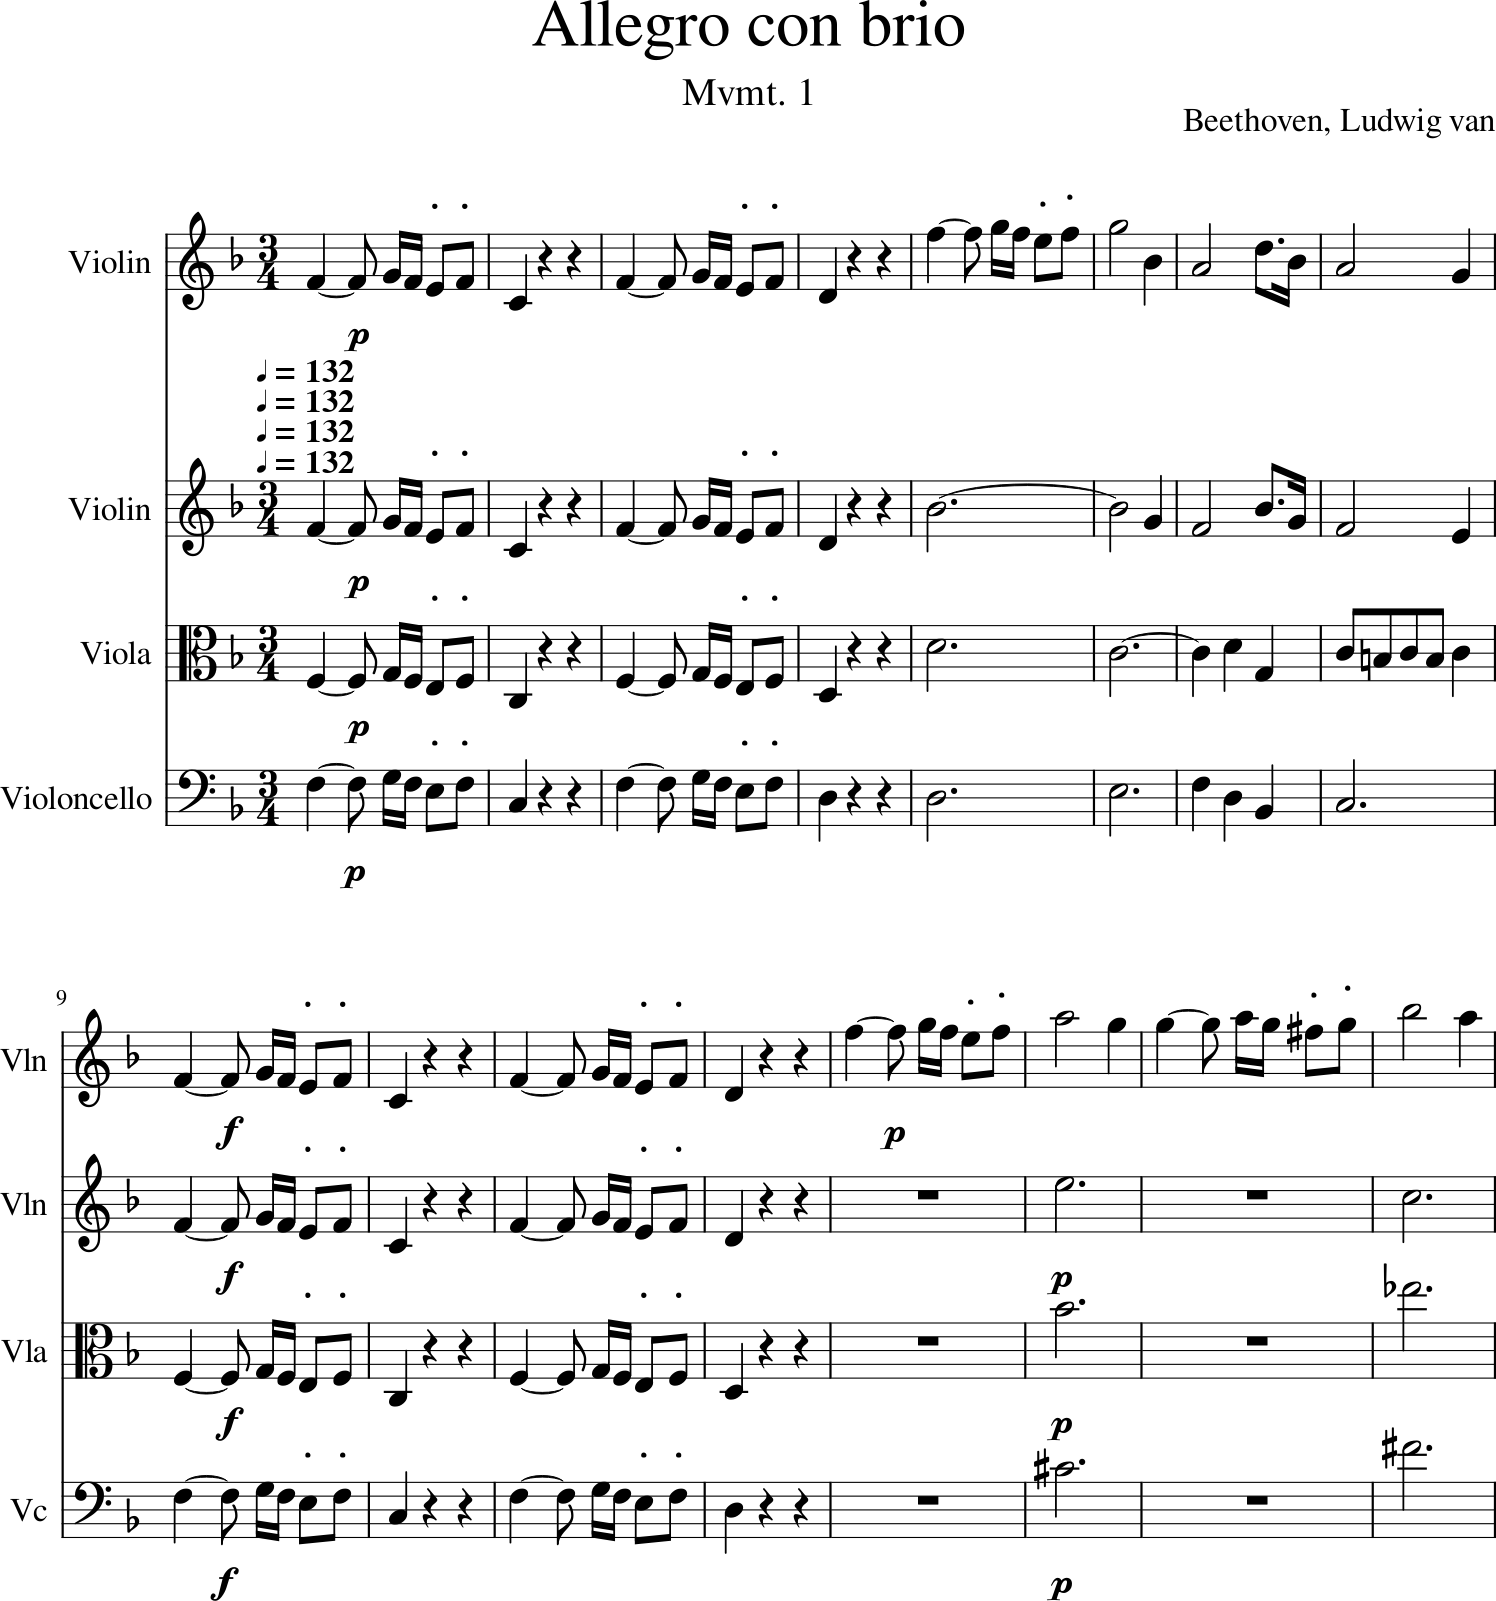

In [2]:
url = 'https://analyse.hfm-weimar.de/database/03/BeLuva_Op18_1-6_1-4_StringQuar_003_00104.xml'
music = converter.parse(url)
music.show()

In order to search for repetitions of the opening motive in exactly the same rhythmic structure, the melodic pattern must now be defined in rhythmic terms as well:

In [3]:
StreamMot=stream.Stream()
StreamMot.append(note.Note('F', quarterLength=1.5))
StreamMot.append(note.Note('G', quarterLength= 0.25))
StreamMot.append(note.Note('F', quarterLength=0.25))
StreamMot.append(note.Note('E', quarterLength=0.5))
StreamMot.append(note.Note('F', quarterLength=0.5))
# The addition 'quaterLength= ' refers to multiples of a quarter note = 1. 

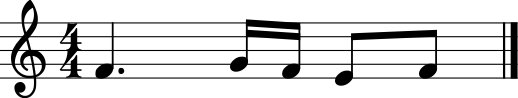

In [4]:
StreamMot.show()

In [5]:
s = music.recurse().notes

In [6]:
# The search is now created with the command  'search.noteNameRhythmicSearch'. 

p = search.noteNameRhythmicSearch(s, StreamMot)
p

[75, 815, 821, 1933, 2847, 2853, 3202, 3735, 3741, 3908, 3914, 4011, 4017]

As expected, the motif appears relatively often: exactly 13 times!

In [7]:
print(len(p))

13


Determining the exact position in the score (measure, beat, voice):

In [8]:
counter=1
for Position in p:
        startingNote=s[Position]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        print('%2s %3s %3s' %(counter, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart)
        counter+=1


 1  F5  22 1.0 <music21.stream.Part Violin>
 2  F5 179 1.0 <music21.stream.Part Violin>
 3  F5 181 1.0 <music21.stream.Part Violin>
 4  F4 181 1.0 <music21.stream.Part Violin>
 5  F3 179 1.0 <music21.stream.Part Viola>
 6  F3 181 1.0 <music21.stream.Part Viola>
 7  F4 300 1.0 <music21.stream.Part Viola>
 8  F2 179 1.0 <music21.stream.Part Violoncello>
 9  F2 181 1.0 <music21.stream.Part Violoncello>
10  F3 262 1.0 <music21.stream.Part Violoncello>
11  F3 264 1.0 <music21.stream.Part Violoncello>
12  F2 302 1.0 <music21.stream.Part Violoncello>
13  F2 304 1.0 <music21.stream.Part Violoncello>


Marking in the score - we take the prominent position in M. 179-181, which appears in several parts at once:

In [9]:
for found in p:
	for ffound in range(len(StreamMot)):
		s[found+ffound].lyric = '*'
		s[found+ffound].style.color='red'


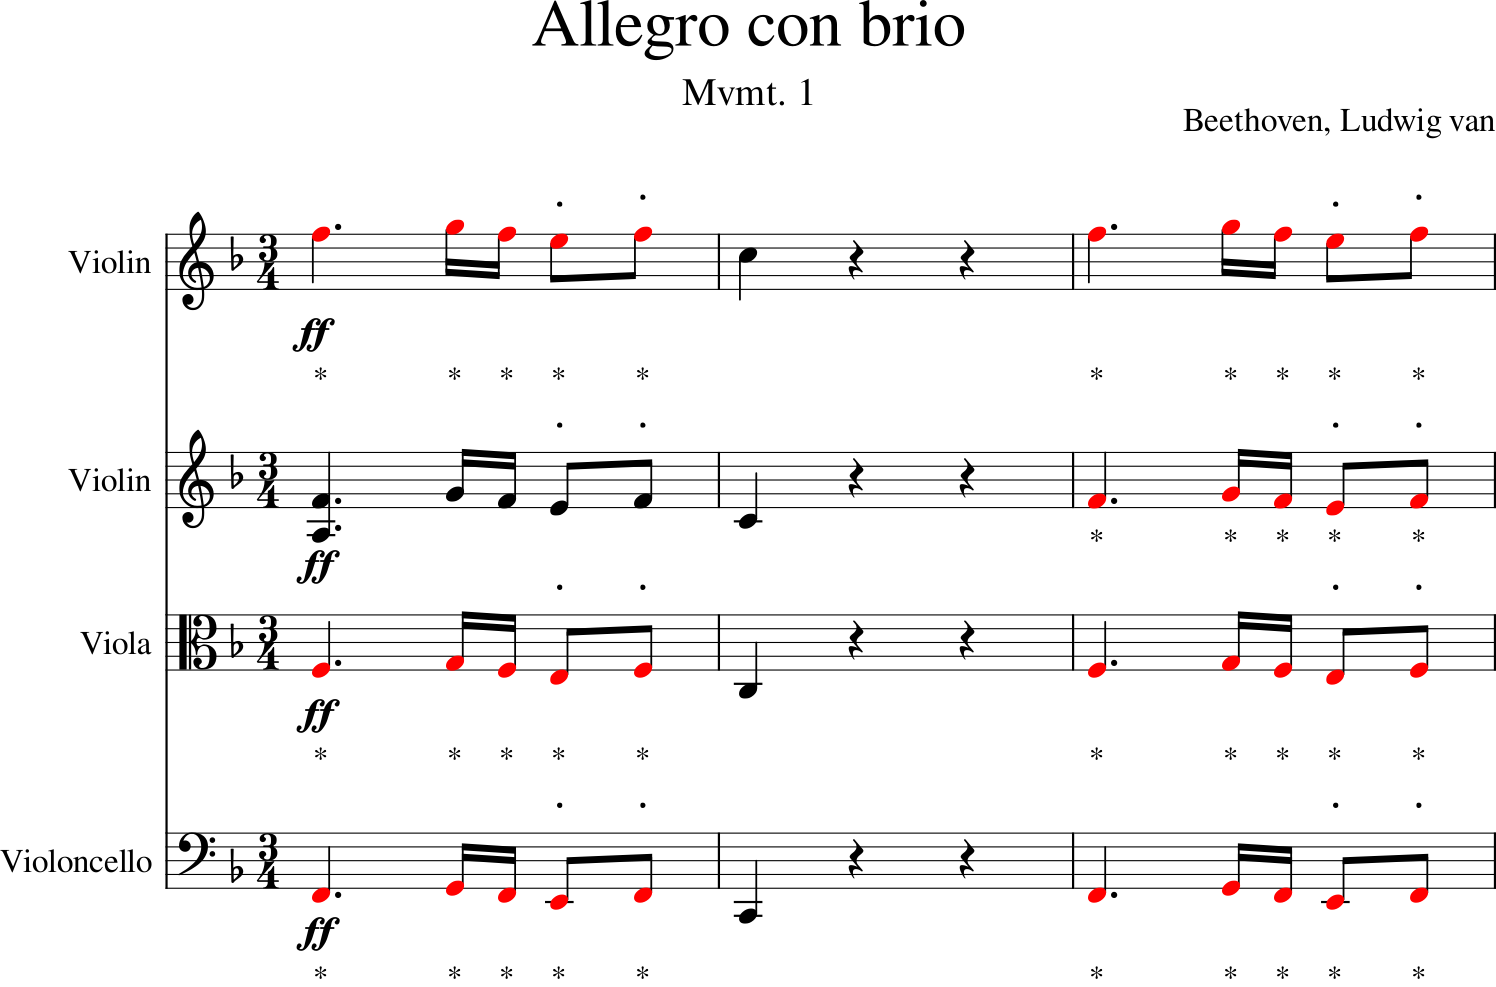

In [10]:
music.measures(179,181).show()

Unfortunately, Beethoven very often did not notate the beginning of the motif as dotted crotchets, but rather as tied crotchets + eighth notes. Unfortunately, this notation is not included in the 13 search results.

To take these tied notes into account, a trick must be used in music21:

The command "stripTies" replaces two tied notes with a note of the same length. By this method, the motifs with overtied note values can now be determined.
 

In [11]:
music_tie = converter.parse(url).stripTies(inPlace=True)
s1 = music_tie.recurse().notes

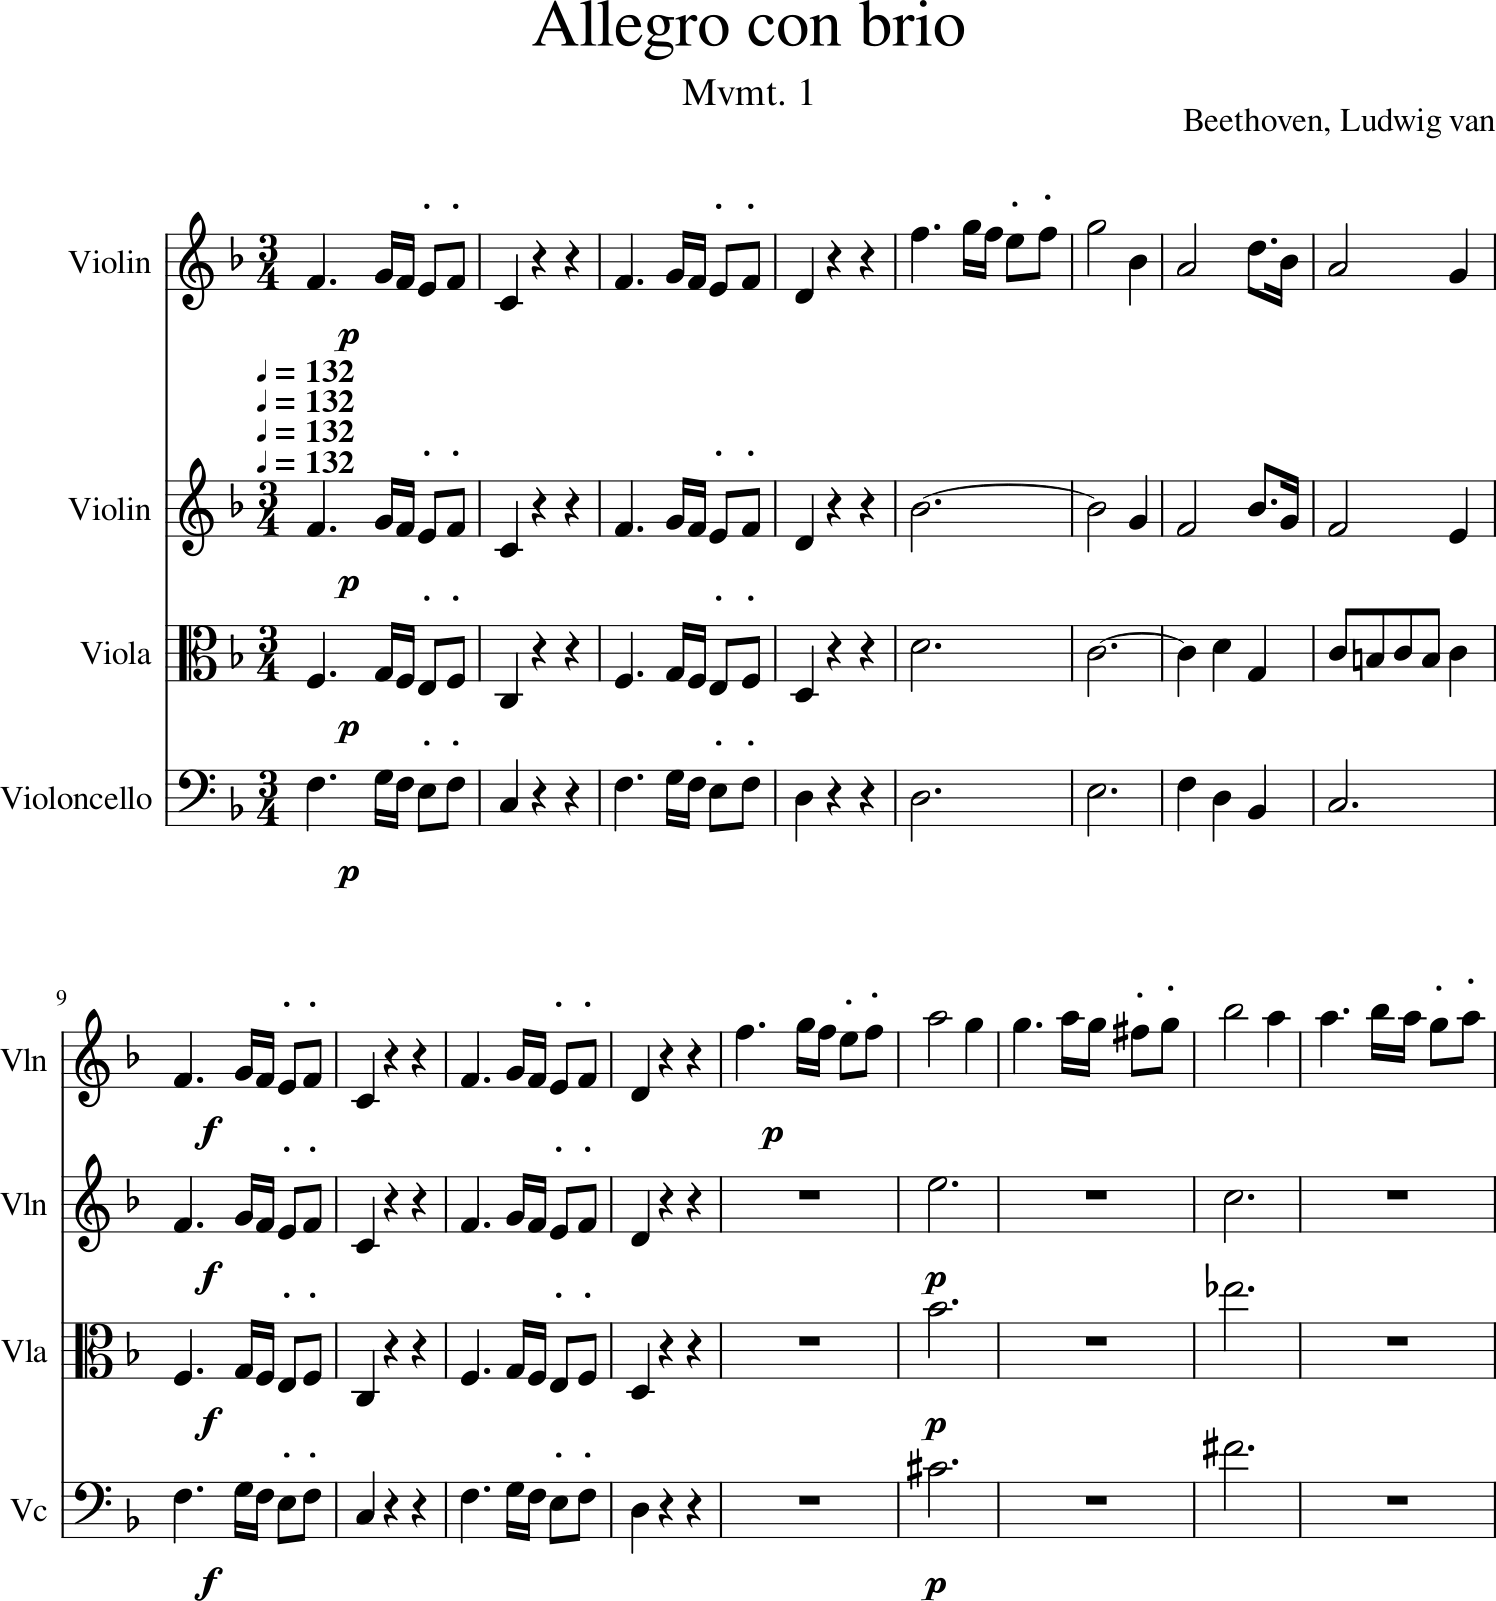

In [12]:
music_tie.show()
# Shows the score without tied notes.  

In [13]:
len(s)
# = Number of notes, if tied notes are counted separately.

4049

In [14]:
len(s1)
# = Number of notes, without separate counting of tied notes.

3917

So by breaking up the ties there are (4049-3918=) 131 less notes!!!

In [15]:
p1 = search.noteNameRhythmicSearch(s1, StreamMot)

If we list the motifs before and after deletion of the ties, it becomes clear that 22 instances have been added now:

In [16]:
print('Without merging tied notes:', len(p))
print('With merging tied notes:', len(p1))

Without merging tied notes: 13
With merging tied notes: 35


Now we determine the exact positions of the individual motifs and mark the places in the score: 

In [17]:
counter=1
for Position in p1:
        startingNote=s1[Position]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        print('%2s %3s %3s' %(counter, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart)
        counter+=1

 1  F4   1 1.0 <music21.stream.Part Violin>
 2  F4   3 1.0 <music21.stream.Part Violin>
 3  F5   5 1.0 <music21.stream.Part Violin>
 4  F4   9 1.0 <music21.stream.Part Violin>
 5  F4  11 1.0 <music21.stream.Part Violin>
 6  F5  13 1.0 <music21.stream.Part Violin>
 7  F5  22 1.0 <music21.stream.Part Violin>
 8  F5 159 1.0 <music21.stream.Part Violin>
 9  F4 162 1.0 <music21.stream.Part Violin>
10  F5 179 1.0 <music21.stream.Part Violin>
11  F5 181 1.0 <music21.stream.Part Violin>
12  F5 183 1.0 <music21.stream.Part Violin>
13  F5 294 1.0 <music21.stream.Part Violin>
14  F4   1 1.0 <music21.stream.Part Violin>
15  F4   3 1.0 <music21.stream.Part Violin>
16  F4   9 1.0 <music21.stream.Part Violin>
17  F4  11 1.0 <music21.stream.Part Violin>
18  F4 181 1.0 <music21.stream.Part Violin>
19  F3   1 1.0 <music21.stream.Part Viola>
20  F3   3 1.0 <music21.stream.Part Viola>
21  F3   9 1.0 <music21.stream.Part Viola>
22  F3  11 1.0 <music21.stream.Part Viola>
23  F3 179 1.0 <music21.stream.Part 

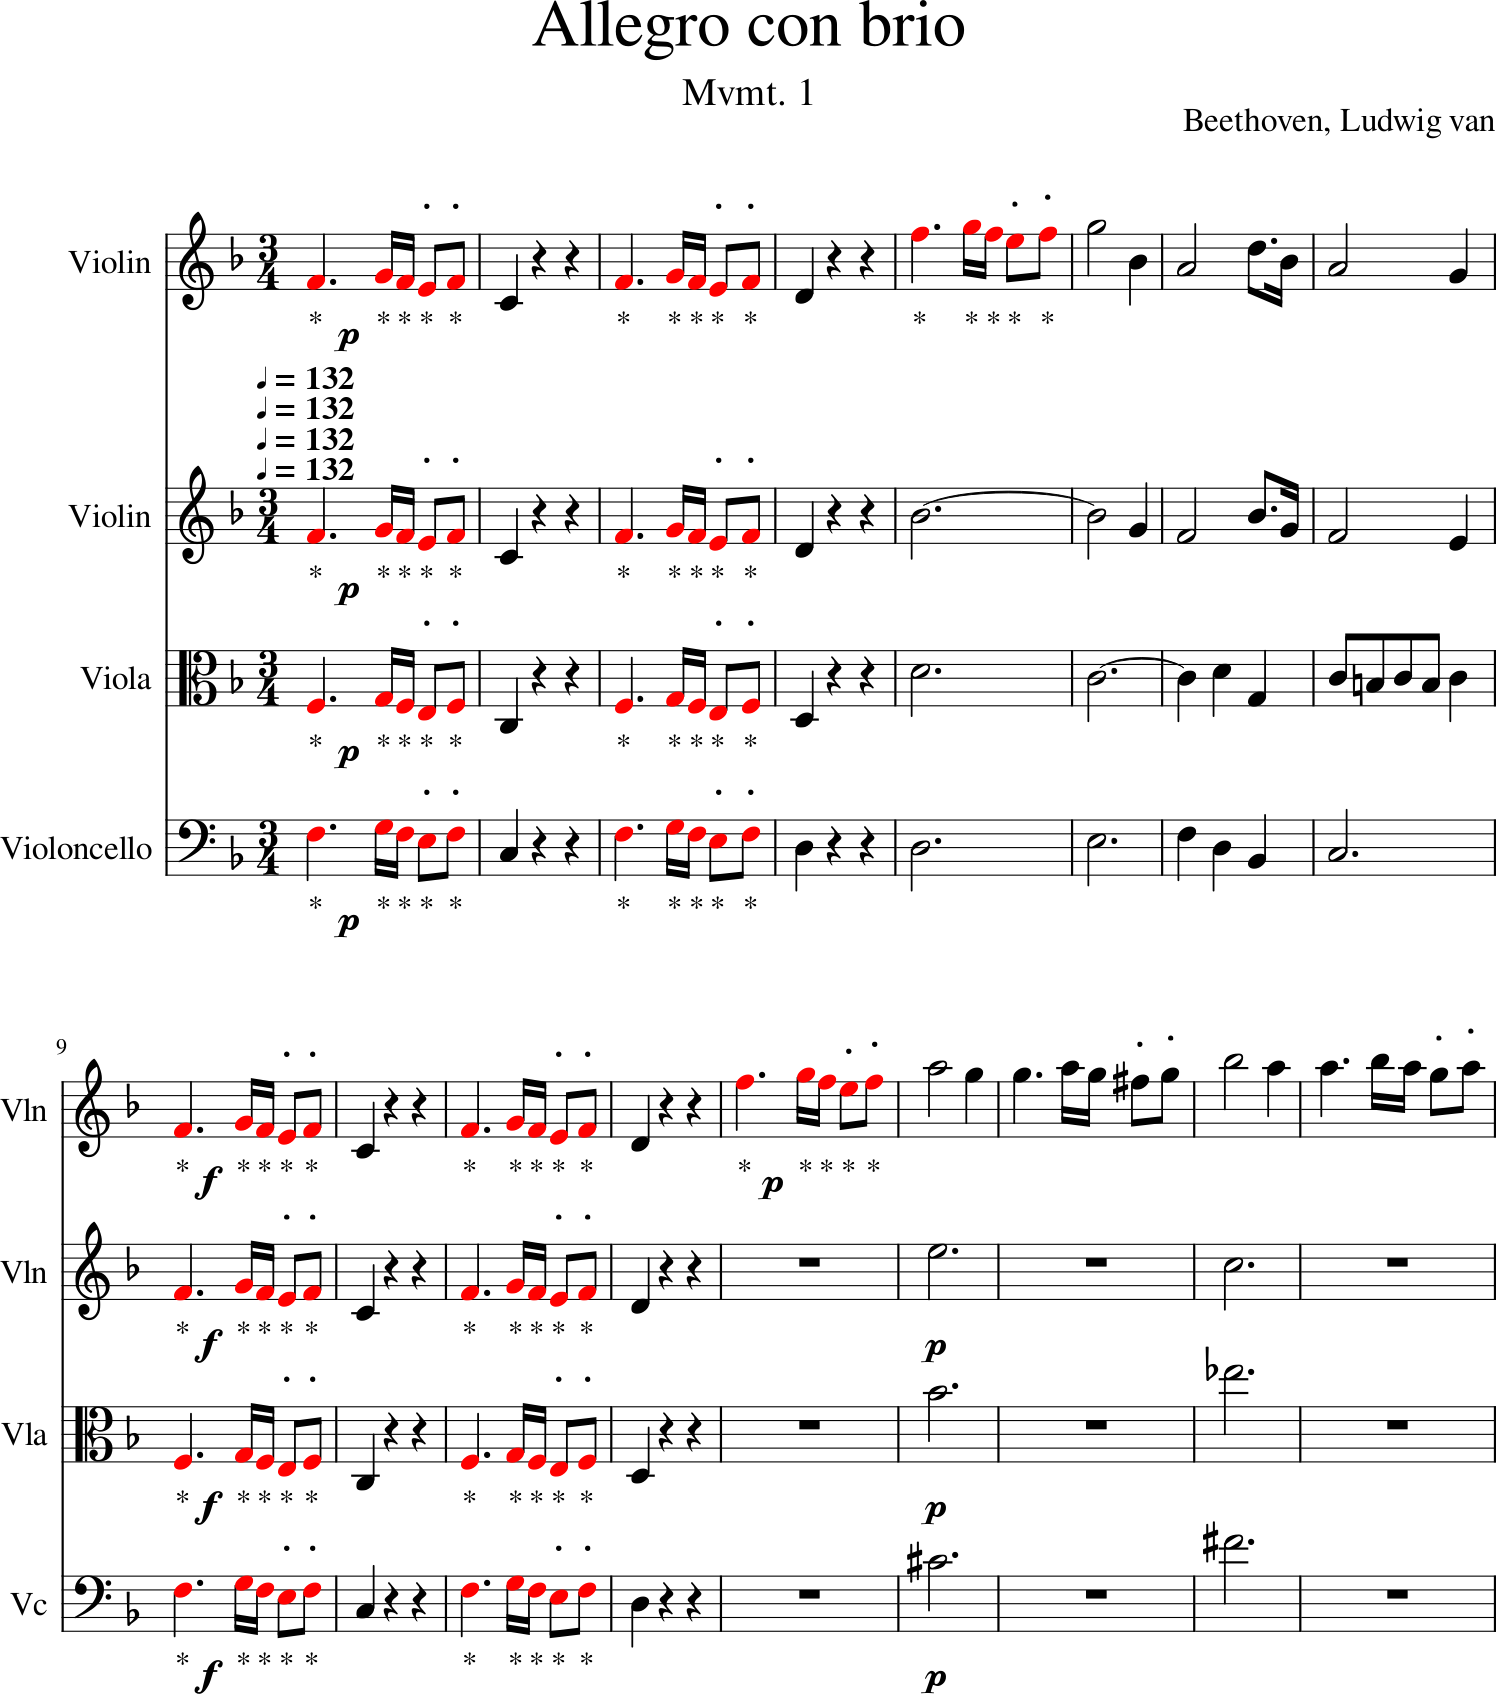

In [18]:
for found in p1:
	for ffound in range(len(StreamMot)):
		s1[found+ffound].lyric = '*'
		s1[found+ffound].style.color='red'
        
music_tie.show()

### Search for transpositions of the motif

In Music21, a command can be programmed to search for every chromatic transposition of a motif. First we need the following command:

In [19]:
def pitchClassEqual(n1, n2):
    if not hasattr(n1, 'pitch'):
        return False
    if not hasattr(n2, 'pitch'):
        return False
    if n1.pitch.pitchClass == n2.pitch.pitchClass:
        return True
    else:
        return False

In the following, we will search for the motif starting at every chromatic  pitch (and their respective enharmonic equivalents). To do this, one must create an algorithm that is repeated 12 times. A second loop helps to enter the information from each repetition into the results list.

In [20]:
results = []
zähler = 1


# The results must be entered in an extra list ("results"). 
# The "counter" simplifies the enumeration of the tones, if you want to show them one after the other.


for egal in range(12):#Suche 12 Mal
    s_len = [StreamMot.notes[i].name for i in range (len(StreamMot.notes))]
    print("------------\nSearching for:", *s_len, sep='   ')
    p = search.streamSearchBase(s, StreamMot, algorithm=pitchClassEqual)
    for notePosition in p:
        startingNote=s[notePosition]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        results.append(notePosition)
        print('%2s %3s %3s' %(zähler, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart.id)
        zähler+=1
    [n.transpose(1, inPlace=True) for n in StreamMot]


# After each search, everything is transposed up half a tone


------------
Searching for:   F   G   F   E   F
 1  F4   1 2.0 Violin
 2  F4   3 2.0 Violin
 3  F5   5 2.0 Violin
 4  F4   9 2.0 Violin
 5  F4  11 2.0 Violin
 6  F5  13 2.0 Violin
 7  F5  19 1.0 Violin
 8  F5  22 1.0 Violin
 9  F5 159 2.0 Violin
10  F4 162 2.0 Violin
11  F5 179 1.0 Violin
12  F5 181 1.0 Violin
13  F5 183 2.0 Violin
14  F5 282 1.0 Violin
15  F5 294 2.0 Violin
16  F4 312 1.0 Violin
17  F4   1 2.0 Violin
18  F4   3 2.0 Violin
19  F4   9 2.0 Violin
20  F4  11 2.0 Violin
21  F4 181 1.0 Violin
22  F4 287 1.0 Violin
23  F5 308 3.5 Violin
24  F3   1 2.0 Viola
25  F3   3 2.0 Viola
26  F3   9 2.0 Viola
27  F3  11 2.0 Viola
28  F3 179 1.0 Viola
29  F3 181 1.0 Viola
30  F4 300 1.0 Viola
31  F3   1 2.0 Violoncello
32  F3   3 2.0 Violoncello
33  F3   9 2.0 Violoncello
34  F3  11 2.0 Violoncello
35  F2 179 1.0 Violoncello
36  F2 181 1.0 Violoncello
37  F3 262 1.0 Violoncello
38  F3 264 1.0 Violoncello
39  F2 265 1.0 Violoncello
40  F3 266 1.75 Violoncello
41  F3 266 2.75 Violoncello


In [21]:
print(len(results))

116


Strikingly, we have found 116 occurrences of the motif on different tone levels.

### Task

Search in sheet music files of your choice for motives you suspect there and for their transpositions! For example, in sonata movements, look for prominent motives from the first or second theme.